# Machine Learning Lab 10

# Simran Kaur

# 311443

# Group 2

# Exercise 1: Exploring Movie Recommendation Dataset

In [158]:
import pandas as pd
import numpy as np
import random
import warnings

Dataset containing the ratings given by all user's to the movies. It is not neccessary that every movie is rated by every user.

In [2]:
rating_data = pd.read_csv('u.data', sep = '\t', header = None)
rating_data.columns = ['user_id', 'item_id', 'rating', 'timestamp']
rating_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Showcase how the ratings vary across users, as an example consider whether the plot is able to tell if
most ratings are only from a handful of users.

In [135]:
ratings_users = dict(rating_data['user_id'].value_counts())
pd.DataFrame(data = {'User id' : ratings_users.keys(), 'Number of ratings': ratings_users.values()}).head(10)

,User id,Number of ratings
0,405,737
1,655,685
2,13,636
3,450,540
4,276,518
5,416,493
6,537,490
7,303,484
8,234,480
9,393,448


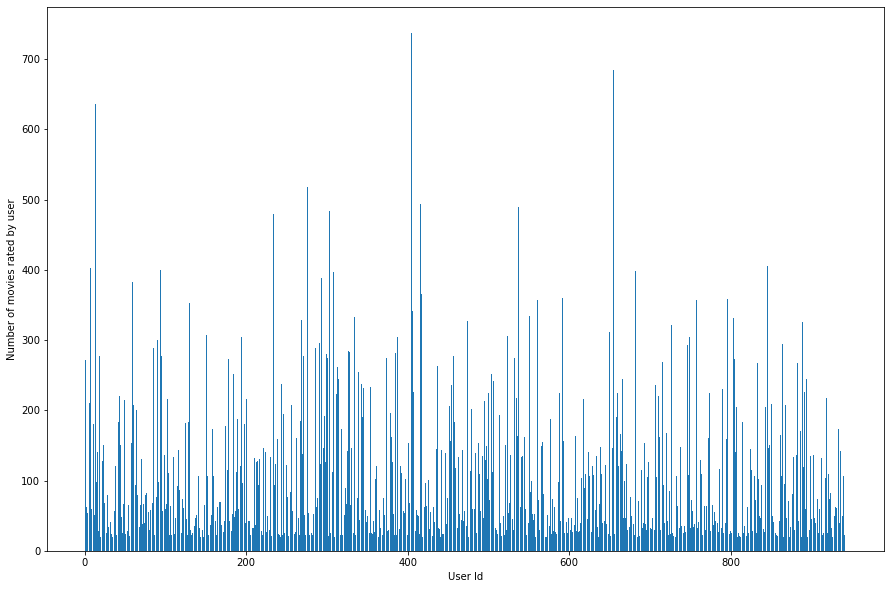

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

r_u = sorted(ratings_users.items())

x, y = zip(*r_u) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xlabel('User Id')
plt.ylabel('Number of movies rated by user')
plt.show()

We have a total of 943 users who has to rate 1682 movies. From the plot one thing that can be seen instantly is that not even one user has rated even half of the movies.

From the plot, We can clearly see that most of the users have rated less number of movies and only few users have rated much of the movies.

Showcase how the ratings vary across items.

In [137]:
ratings_items = dict(rating_data['item_id'].value_counts())
pd.DataFrame(data = {'movie id' : ratings_items.keys(), 'Number of users who rated ': ratings_items.values()}).head(10)

,movie id,Number of users who rated
0,50,583
1,258,509
2,100,508
3,181,507
4,294,485
5,286,481
6,288,478
7,1,452
8,300,431
9,121,429


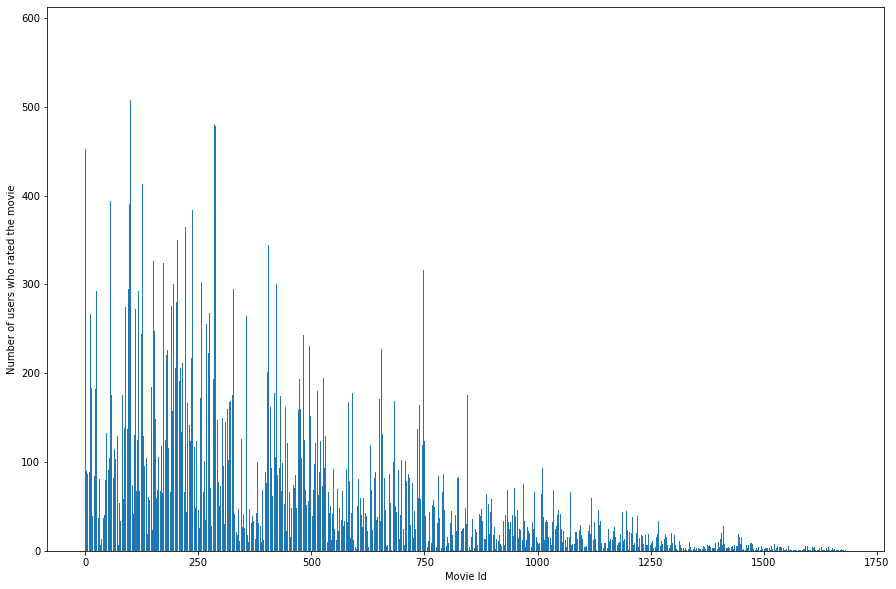

In [6]:
plt.figure(figsize=(15,10))
r_i = sorted(ratings_items.items()) 

u, v = zip(*r_i) # unpack a list of pairs into two tuples

plt.bar(u, v)
plt.xlabel('Movie Id')
plt.ylabel('Number of users who rated the movie')
plt.show()

From the plot, We can clearly see that most of the movies are rated by less number of users and only few movies are rated by much of the users.

Are there genres that are more highly rated than others?

Firstly Collected all the movies that have recieved 5 rating.

In [145]:
genre_data = pd.read_csv('u.item', sep = '|', header = None, encoding='latin-1')
# rating_data.columns = ['user id', 'item id', 'rating', 'timestamp']
genre_data.columns = ["movie id", "movie title", "release date", "video release date",
                      "IMDb URL", "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]

In [138]:
movies5rating = list(rating_data['item_id'].loc[rating_data['rating'] == 5].unique())

In [9]:
movie_data = pd.merge(rating_data, genre_data, left_on = 'item_id', right_on = 'movie id' )
movie_data

,user_id,item_id,rating,timestamp,movie id,movie title,release date,video release date,IMDb URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,1674,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,1640,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,1637,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,1630,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,...,0,0,0,0,0,0,0,0,0,0


After collecting movies that have been rated 5 collect the genres of each of them i.e. how many of those movies belong to a particular genre.

In [146]:
best_genre = {}

for col in [ "unknown", "Action", "Adventure", "Animation",
          "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
          "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
          "Thriller", "War", "Western"]:
    sumgenre = []
    for indx in movies5rating:
        sumgenre.append((genre_data[col].loc[genre_data['movie id'] == indx]))
    genre = [item for sublist in sumgenre for item in sublist]
    best_genre[col] = sum(genre)   

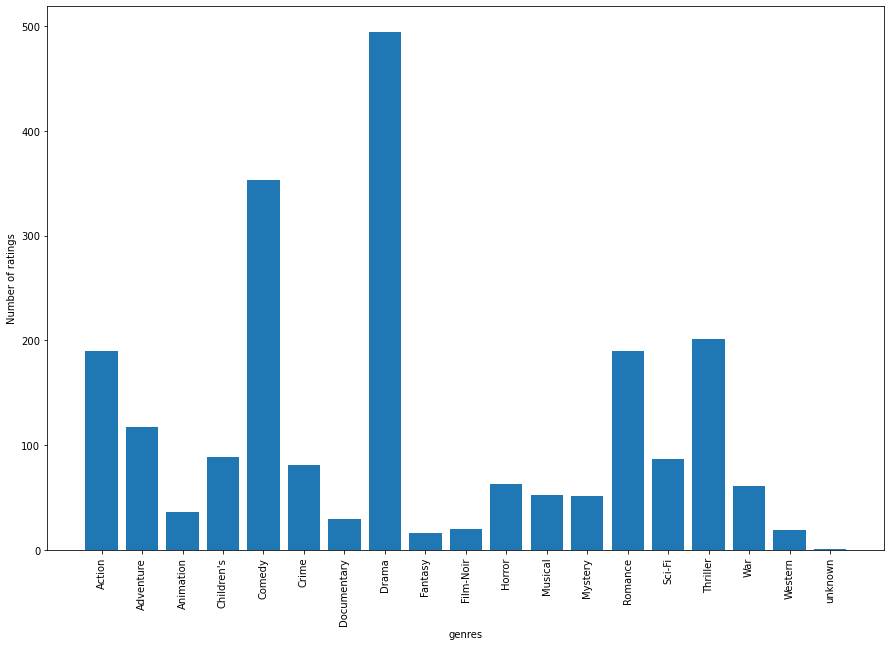

In [14]:
plt.figure(figsize=(15,10))
b_g = sorted(best_genre.items()) # sorted by key, return a list of tuples

k, l = zip(*b_g) # unpack a list of pairs into two tuples

plt.bar(k, l)
plt.xlabel('genres')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 90)
plt.show()

In [147]:
max_genre = sorted(best_genre, key=best_genre.get, reverse = True)[:5]
max_genre

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']

What age groups prefer what genres based on ratings? You can bin respective ages to your preference.

User data gives information about user's age, address etc.

In [16]:
user_data = pd.read_csv("u.user", sep = "|", header = None)
user_data.columns = ["user_id", "age", "gender", "occupation", "zip_code"]
user_data

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Check particular age groups we can divide our data into.

In [17]:
user_data["age"].value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: age, Length: 61, dtype: int64

Again considering those users that have given rating 5 to look for the most prefered genres in different age groups.

In [18]:
user_rating = pd.merge(rating_data, user_data, on = 'user_id')
user_rating_genre = user_rating.merge(genre_data, left_on = 'item_id', right_on = 'movie id')
user_rating_5 = user_rating_genre[user_rating_genre.rating == 5]
user_rating_5

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie id,movie title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,305,242,5,886307828,23,M,programmer,94086,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
7,249,242,5,879571438,25,M,student,84103,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
10,145,242,5,875269755,31,M,entertainment,V3N4P,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
13,18,242,5,880129305,35,F,other,37212,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
14,1,242,5,889751633,24,M,technician,85711,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,675,1628,5,889489837,34,M,other,28814,1628,Lamerica (1994),...,0,0,0,0,0,0,0,0,0,0
99954,655,1643,5,887611511,50,F,healthcare,60657,1643,Angel Baby (1995),...,0,0,0,0,0,0,0,0,0,0
99957,901,1643,5,877130473,38,M,executive,L1V3W,1643,Angel Baby (1995),...,0,0,0,0,0,0,0,0,0,0
99964,675,1653,5,889489913,34,M,other,28814,1653,Entertaining Angels: The Dorothy Day Story (1996),...,0,0,0,0,0,0,0,0,0,0


In [149]:
genres_age = {}
i = 0
h = 10

# dk = user_rating_genre[ & (user_rating_genre['age'].between(0, 50))]
# dk
while i < 8:
    for idx in user_rating_genre['user_id'][user_rating_genre['age'].between(i*h, (i+1)*h)]:
        sum_genre = {}
        for cols in [ "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]:
            sum_genre[cols] = sum((user_rating_genre[cols][user_rating_genre['user_id'] == idx]))   
        genres_age[(i*h, (i+1)*h)] = max(sum_genre, key = sum_genre.get)
    i = i + 1    


In [156]:
data = {'Age' : genres_age.keys(), 'genre': genres_age.values()}
pd.DataFrame(data = data)

,Age,genre
0,"(0, 10)",Children's
1,"(10, 20)",Drama
2,"(20, 30)",Drama
3,"(30, 40)",Drama
4,"(40, 50)",Drama
5,"(50, 60)",Drama
6,"(60, 70)",Drama
7,"(70, 80)",Drama


# Exercise 2: Implementing basic matrix factorization (MF) technique
# for recommender systems

Ratings given by each user to each movies and since not every movie is rated by every user most of the entries will be missing.

In [19]:
movie_rating = user_rating_genre.pivot_table(index = 'user_id', columns = 'item_id', values = 'rating')
movie_rating

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rating Matrix

In [20]:
matrix_rating = movie_rating.to_numpy()
for i in range(len(matrix_rating)):
    for j in range(len(matrix_rating[0])):
        if np.isnan(matrix_rating[i, j]):
            matrix_rating[i, j] = 0
matrix_rating

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

Normalizing the rating matrix

In [21]:
matrix_rating_nor = (matrix_rating - matrix_rating.min())/(matrix_rating.max() - matrix_rating.min())

In [22]:
matrix_rating_nor

array([[1. , 0.6, 0.8, ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

This function when given input as Rating matrix returns first 80% users data as training 10% for validation and rest 10% for testing.

In [23]:
def split(matrix):
    size = int(0.8*matrix.shape[0])
    Train = matrix[:size, :]
    Val = matrix[size:size + int(0.1*matrix.shape[0]), :]
    Test = matrix[size + int(0.1*matrix.shape[0]): , :]
    return Train, Val, Test

Choosing different values for three hyperparameters namely latent features, learning rate and regularization term.

In [24]:
latentfeatures = [3, 4, 5]
alpha = [0.008, 0.005, 0.001]
lamda = [0.1, 0.3, 0.5]
parameter_set = [[k, a, l] for k in latentfeatures for a in alpha for l in lamda]
parameter_set

[[3, 0.008, 0.1],
 [3, 0.008, 0.3],
 [3, 0.008, 0.5],
 [3, 0.005, 0.1],
 [3, 0.005, 0.3],
 [3, 0.005, 0.5],
 [3, 0.001, 0.1],
 [3, 0.001, 0.3],
 [3, 0.001, 0.5],
 [4, 0.008, 0.1],
 [4, 0.008, 0.3],
 [4, 0.008, 0.5],
 [4, 0.005, 0.1],
 [4, 0.005, 0.3],
 [4, 0.005, 0.5],
 [4, 0.001, 0.1],
 [4, 0.001, 0.3],
 [4, 0.001, 0.5],
 [5, 0.008, 0.1],
 [5, 0.008, 0.3],
 [5, 0.008, 0.5],
 [5, 0.005, 0.1],
 [5, 0.005, 0.3],
 [5, 0.005, 0.5],
 [5, 0.001, 0.1],
 [5, 0.001, 0.3],
 [5, 0.001, 0.5]]

This function when passed with rating matrix and hyperparameters defined above returns the matrix factors namely matrices P and Q and the RMSE at each epoch.

In [86]:
def factorization(train, K, alpha, lamda):
    epochs = 10
    rmse = []
    P = np.random.normal(0, 1, (train.shape[0], K))
    Q = np.random.normal(0, 1, (train.shape[1], K))
    Q = Q.T
    diff = 0
    for e in range(epochs):
        for i in range(train.shape[0]):
            for j in range(train.shape[1]):
                if train[i, j] > 0:
                    diff = train[i,j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i, k] = P[i, k] + alpha*(diff*Q[k, j] - lamda*P[i, k])
                        Q[k, j] = Q[k, j] + alpha*(diff*P[i, k] - lamda*Q[k, j])

        rmse.append(RMSError(train, P, Q))
            
    return P, Q, rmse
    

This function when passed with rating matrix, P and Q gives the root mean squared error.

In [87]:
def RMSError(X, Y, Z):
    return (np.sum(np.power((X - np.dot(Y, Z)), 2))/(X.shape[0]*X.shape[1]))**(0.5)
    

Function for K-Fold Cross Validation.

In [88]:
def crossval_split(X, C, c):
    part = X.shape[0]//C
    B = [0]*C
    for j in range(C):
        B[j] = X[j*part: (j+1)*part, :]   
    X_test = B[c][:, :] 
    trainx = [x[:] for i,x in enumerate(B) if i != c]
    X_train = [item for sublist in trainx for item in sublist]
    return np.array(X_train), np.array(X_test)

This function tunes hyperparameter by taking one set of hyperparameter and then sending the training data for cross validation and then calculating average RMSE. At the end, the hyperparameters that gives the minimum RMSE are chosen.

In [89]:
def hyperparameterTuning(X):
    C = 5
    l = X.shape[0]//C
    s = len(parameter_set)
    Rmse = []
    Rmse_mean = []
    err = 0
    for i in range(s):
        K, alpha, lamda = parameter_set[i]
        for j in range(C):
            xTrain = crossval_split(X, C, j)[0]
            xTest = crossval_split(X, C, j)[1]
            p, q = factorization(X , K, alpha, lamda)[0:2]
            p_test = np.array(p[j*l: (j+1)*l, :])
            q_test = q
            Rmse.append(RMSError(xTest, p_test, q_test))
        Rmse_mean.append([np.mean(Rmse), K, alpha, lamda])   
    er, best_K, best_alpha, best_lamda = min(Rmse_mean, key=lambda x: x[0])
    return er, best_K, best_alpha, best_lamda

In [90]:
Train, Val, Test = split(matrix_rating_nor)

In [91]:
train_err, best_K, best_alpha, best_lamda = hyperparameterTuning(Train)

Error on the training data when passed best hyperparameters using hyperparameter tuning.

In [92]:
train_err

0.43326028931299304

In [93]:
best_K

3

In [94]:
best_alpha

0.008

In [95]:
best_lamda

0.5

Now using the above found best latent feature, learning rate and regularization coefficient, P and Q for validation set are calculated to report RMSE at validation set.

In [96]:
P_train, Q_train, Err_train = factorization(Train, best_K, best_alpha, best_lamda)

In [114]:
P_val, Q_val, Err_val = factorization(Val, best_K, best_alpha, best_lamda)

In [115]:
RMSError(Val, P_val, Q_val)

0.2667241958774694

Now using the above found best latent feature, learning rate and regularization coefficient, P and Q for test set are calculated to report RMSE at Test set.

In [116]:
P_test, Q_test, Err_test  = factorization(Test, best_K, best_alpha, best_lamda)

In [117]:
RMSError(Test, P_test, Q_test)

0.24065742835925638

Plot showing RMSE for training, validation and test at each epoch.

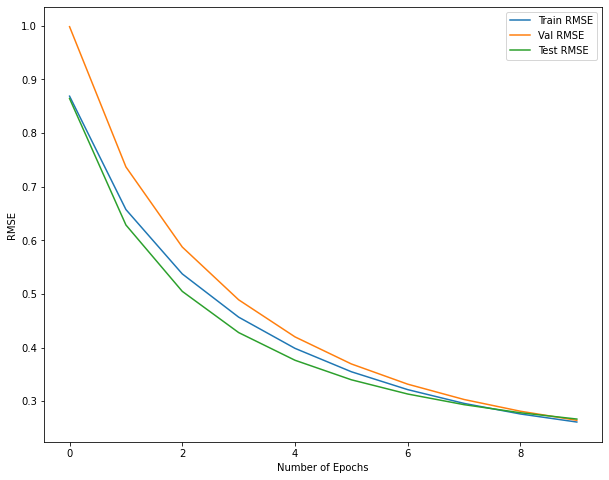

In [101]:
plt.figure(figsize=(10,8))
plt.plot(Err_train, label = 'Train RMSE')
plt.plot(Err_val,label = 'Val RMSE')
plt.plot(Err_test,label = 'Test RMSE')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Exercise 3: Recommender Systems using matrix factorization sckitlearn

In [102]:
from sklearn.decomposition import NMF

Since Non matrix factorization uses coordinate descent as optimization technique to update P and Q, no learning rate is there as in the case of stochastic gradient descent.

In [103]:
parameter_set_2 = [[k, l] for k in latentfeatures for l in lamda]
parameter_set_2

[[3, 0.1],
 [3, 0.3],
 [3, 0.5],
 [4, 0.1],
 [4, 0.3],
 [4, 0.5],
 [5, 0.1],
 [5, 0.3],
 [5, 0.5]]

In [160]:
def hyperparameterTuning_2(X):
    C = 3
    l = X.shape[0]//C
    s = len(parameter_set_2)
    Rmse = []
    Rmse_mean = []
    err = 0
    for i in range(s):
        K, lamda = parameter_set_2[i]
        for j in range(C):
            xTrain = crossval_split(X, C, j)[0]
            xTest = crossval_split(X, C, j)[1]
            model = NMF(n_components = K, alpha = lamda, init='random', random_state=0, max_iter = 500)
            p = model.fit_transform(X)
            q = model.components_
            p_test = np.array(p[j*l: (j+1)*l, :])
            q_test = q
            Rmse.append(RMSError(xTest, p_test, q_test))
        Rmse_mean.append([np.mean(Rmse), K, lamda])   
    er, best_K, best_lamda = min(Rmse_mean, key=lambda x: x[0])
    return er, best_K, best_lamda

In [161]:
Train_err, Best_K, Best_lamda = hyperparameterTuning_2(Train)

Best found hyperparameters.

In [163]:
Best_K

5

In [164]:
Best_lamda

0.5

Calculating the RMSE for Training Set.

In [169]:
model_train = NMF(n_components = Best_K, alpha = Best_lamda, init='random', random_state=0)
p_train = model_train.fit_transform(Train)
q_train = model_train.components_

In [170]:
RMSError(Train, p_train, q_train)

0.14425826831792915

Calculating RMSE for validation set

In [165]:
model_val = NMF(n_components = Best_K, alpha = Best_lamda, init='random', random_state=0)
p_val = model_val.fit_transform(Val)
q_val = model_val.components_

C:\Users\simra\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [166]:
RMSError(Val, p_val, q_val)

0.12904443854969225

Calculating RMSE for Test set.

In [167]:
model_test = NMF(n_components = Best_K, alpha = Best_lamda, init='random', random_state=0)
p_test = model_test.fit_transform(Test)
q_test = model_test.components_

In [168]:
RMSError(Test, p_test, q_test)

0.13970454174280483

Using Sklearn with 500 iterations the following are the RMSE on train, validation and test sets.

In [173]:
pd.DataFrame({'Set': ['Train', 'Validation', 'Test'], 'RMSE': [RMSError(Train, p_train, q_train), RMSError(Val, p_val,
                            q_val), RMSError(Test, p_test, q_test)]})

,Set,RMSE
0,Train,0.144258
1,Validation,0.129044
2,Test,0.139705


Using SGD for matrix factorization with 10 iterations the following are the RMSE on train, validation and test sets.

In [174]:
pd.DataFrame({'Set': ['Train', 'Validation', 'Test'], 'RMSE': [train_err, RMSError(Val, P_val, Q_val)
                                                               , RMSError(Test, P_test, Q_test)]})

,Set,RMSE
0,Train,0.433260
1,Validation,0.266724
2,Test,0.240657
